__Задача 1__

Даны значения величины заработной платы заемщиков банка (`salary`) и значения их поведенческого кредитного скоринга (`scoring`):
```
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
```
Возьмём в качестве признака значение `salary`, а в качестве целевой переменной - `scoring`.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте `scatter plot` по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [8]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])

In [9]:
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.

Для парной регрессии коэффициенты вычисляются по формулам:
$$b_1 = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2}, \:
b_0 = \overline{y} - b_1 \cdot {\overline{x}}.$$

Здесь $x$, $y$ — данные из выборки, $\overline{x}$ обозначает выборочное среднее.

In [44]:
b1 = (np.mean(salary * scoring ) - np.mean(salary) * np.mean(scoring)) / (np.mean(salary ** 2) - np.mean(salary) ** 2)
print('Коэффицент b1 равен {}'.format(b1))

Коэффицент b1 равен 2.620538882402765


In [13]:
b0 = np.mean(scoring) - b1 * np.mean(salary)
print('Коэффицент b0 равен {}'.format(b0))

Коэффицент b0 равен 444.1773573243596


Модель линейной регресии будет иметь вид:
$$y = 444.177 + 2.62x $$

Для __метода наименьших квадратов__:
$$(X \cdot b - y)^\top \cdot (X \cdot b - y) \rightarrow \min_b.$$

In [14]:
x2 = pd.DataFrame(salary)
y2 = pd.DataFrame(scoring)
x2.shape

(10, 1)

К матрице $X$ нужно также добавить столбец из $1$, соответствующий фиктивному фактору.

In [15]:
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))

In [16]:
x2.shape

(10, 2)

In [17]:
x2

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

Запишем матрицу $X^\top X$ и посчитаем её определитель.

In [18]:
XTX = x2.T.dot(x2)

np.linalg.det(XTX)

349464.00000000023

Определитель не близок к нулю, поэтому можно записать аналитическое решение:

In [19]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x2.T).dot(y2)

print(b)

[[444.17735732]
 [  2.62053888]]


Поскольку коэффициенты совпадают, модель будет иметь такой же вид:
$$y = 444.177 + 2.62x $$

2. Постройте `scatter plot` по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.

Text(0, 0.5, 'scoring')

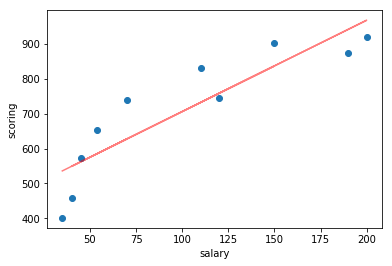

In [21]:
ox = salary
oy = b0 + b1 * ox

plt.scatter(salary, scoring)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('salary')
plt.ylabel('scoring')

3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.

pred_scoring = b0 + b1 * salary
R1 = pred_scoring.var() / scoring.var()
print('Коэффициент детерминации {}'.format(R1))

Посчитаем среднюю ошибку аппроксимации:

In [26]:
def mean_approximation_error(y_real, y_pred):
    return np.abs((y_real - y_pred) / y_real).mean()
  

A = mean_approximation_error(scoring, pred_scoring)
print('Средняя ошибка аппроксимации {}'.format(A))

Средняя ошибка аппроксимации 0.11469251843561709


4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.

Соответствующая статистика равна
$$T = \dfrac{R^2}{1 - R^2} \cdot \dfrac{n - k - 1}{k},$$
где $R^2$ — коэффициент детерминации, $n$ — число наблюдений, $k$ — число факторов. 

In [30]:
k1 = 1
k2 = salary.shape[0] - k1 - 1
T1 = (R1 / (1 - R1)) * (k2 / k1)
T1

29.67164085966437

In [29]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

Имеем $T > F_{crit}$, поэтому уравнение регрессии статистически значимо.

5. Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.

В случае парной регрессии с помощью t-распределения Стьюдента можно оценить статистическую значимость каждого параметра из уравнения регрессии, а также построить доверительные интервалы.

Например, оценим значимость и построим доверительный интервал коэффициента наклона $b_1$ (из уравнения $y = b_0 + b_1 \cdot x$). Нам понадобится значение __стандартной ошибки коэффициента наклона__. Она вычисляется по формуле:
$$S_{slope} = \sqrt{\dfrac{\frac{1}{n - 2} \displaystyle\sum_{i=1}^{n}(y_i - z_i)^2}{\displaystyle\sum_{i=1}^n (x_i - \overline{x})^2}},$$

где:
* $x$, $x_i$ — соответственно, все значения и конкретное значение фактора
* $y_i$ — конкретное значение оцениваемой (целевой) переменной
* $z_i$ — «предсказанное» значение, полученное с помощью модели регрессии
* $n$ — число элементов в выборке

In [33]:
def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента наклона.
    """
    
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [34]:
s_slope = standard_error_slope(salary, scoring, pred_scoring)
s_slope

0.48108279568516005

Зададим уровень значимости $\alpha = 0.05$. В нашем случае $n = 10$, поэтому нас интересует квантиль $t_{1 - 0.05/2, \: 8} = 2.306$.

In [37]:
alpha = 0.05
t = stats.t.ppf(1 - alpha/2, salary.shape[0]-2)
t

2.3060041350333704

Аналогично можно проверить значимость коэффициента сдвига $b_0$ и построить доверительный интервал для него. Стандартная ошибка коэффициента сдвига вычисляется по формуле:
$$S_{intercept} = S_{slope} \cdot \sqrt{\dfrac{1}{n} \displaystyle\sum_{i=1}^n x_i^2}.$$

In [38]:
def standard_error_intercept(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента сдвига.
    """
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [39]:
s_intercept = standard_error_intercept(salary, scoring, pred_scoring)
s_intercept

56.46649755068153

In [40]:
T = b0 / s_intercept
T

7.866210524668863

Значение попало в критическую область, значит, значение параметра $b_0$ является значимым.

Доверительный интервал для параметра $b_0$:

In [42]:
(b0 - t * s_intercept, b0 + t * s_intercept)

(313.9653804816363, 574.3893341670829)

__Задача 2__

Посчитать коэффициенты линейной регрессии для т.н. Квартета Энскомба (см. урок 6).

Поскольку имеет место только один признак, вычислим коэффициенты для парной регрессии:

In [60]:
df = pd.read_csv('anscombe_dataset.csv', index_col='id')

df

,x1,y1,x2,y2,x3,y3,x4,y4
id,,,,,,,,
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


In [56]:
def simple_linear_regression(x, y): 
    b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
    b0 = np.mean(y) - b1 * np.mean(x)
    return b0, b1

In [61]:
b0_1, b1_1 = simple_linear_regression(df['x1'], df['y1'])

b0_1, b1_1

(3.0000909090909245, 0.5000909090909076)

In [62]:
b0_2, b1_2 = simple_linear_regression(df['x2'], df['y2'])

b0_2, b1_2

(3.000909090909091, 0.5)

In [63]:
b0_3, b1_3 = simple_linear_regression(df['x3'], df['y3'])

b0_3, b1_3

(3.0024545454545697, 0.49972727272727013)

In [64]:
b0_4, b1_4 = simple_linear_regression(df['x4'], df['y4'])

b0_4, b1_4

(3.0017272727272584, 0.4999090909090924)

Модель линейной регресии для Квартета Энскомба будет иметь вид:
$$y = 3 + 0.5x $$

На графике это будет выглядеть так: 

In [75]:
ox1 = df['x1']
oy1 = b0_1 + b1_1 * ox1

(2, 14)

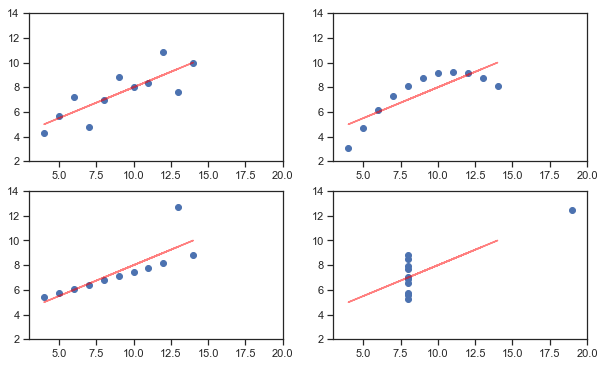

In [77]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10, 6)

ax1, ax2, ax3, ax4 = axes.flatten()

ax1.scatter(df['x1'], df['y1'])
ax1.plot(ox1, oy1, color='red', alpha=0.5)
ax1.set_xlim(3, 20)
ax1.set_ylim(2, 14)

ax2.scatter(df['x2'], df['y2'])
ax2.plot(ox1, oy1, color='red', alpha=0.5)
ax2.set_xlim(3, 20)
ax2.set_ylim(2, 14)

ax3.scatter(df['x3'], df['y3'])
ax3.plot(ox1, oy1, color='red', alpha=0.5)
ax3.set_xlim(3, 20)
ax3.set_ylim(2, 14)

ax4.scatter(df['x4'], df['y4'])
ax4.plot(ox1, oy1, color='red', alpha=0.5)
ax4.set_xlim(3, 20)
ax4.set_ylim(2, 14)